In [1]:
import numpy as np
from typing import Dict, Tuple, Union, List, Iterable
import os

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rc

%load_ext autoreload
%autoreload 2

<div class="alert alert-success" role="alert">
<a href="#" class="close" data-dismiss="alert" aria-label="close">&times;</a>
  <i class="fa fa-question-circle" style="font-size:22px;color:green"></i> <strong><u><font size=5> Task: </font></u></strong> <br/>
    <hr>
    <font size=5>Implement the perceptron algorithm to separate the given data.</font>
</div>

Let`s download data from [google drive](https://drive.google.com/drive/u/0/folders/1USmxeWvVRBK4YcLebl9bICx_q2zcrWJN) by running file **load_data.py**

In [2]:
PROJECT_PATH =  os.getcwd() + "/../"
DATA_LOADING_FILE = PROJECT_PATH + 'tools/load_data.py'
SAVE_PATH = PROJECT_PATH + "data/"
SAVE_NAME = "data.csv"

In [3]:
%run -i {DATA_LOADING_FILE} --save-path={SAVE_PATH} --save-name={SAVE_NAME}

<div style="text-align: center"><font size=5><b>Recall that the perceptron step works as follows:</b><br/></div>

> For a point with coordinates *(p,q)*, label *y* and prediction given by the equation:

$$\hat{y} = step(w_1x_1 + w_2x_2 + b)$$


$$step(x) = 
    \begin{cases}
        0, &  x < 0 \\    
        1, &  x \ge 0 \\    
\end{cases}$$

* If the point is correctly classified, do nothing.<br/>
* If the point is classified positive, but it has a negative label, subtract $\alpha p$, $\alpha q$ and $\alpha$ from $w_1$, $w_2$ and $b$ respectively.
* If the point is classified negative, but it has a positive label, add $\alpha p$, $\alpha q$ and $\alpha$ to $w_1$, $w_2$ and $b$ respectively.

Let us use axilliary functions for building boundary line.

In [4]:
# Step function, which helps us to convert each prediction score to the coresspining class labels.
def stepFunction(x: Union[np.ndarray, float]) -> Union[np.ndarray, int]:
    """
    Convert negative values into 0 and not negative into 1.

    Parameters
    ----------
    :param x: np.ndarray OR float: input object for conversion
    
    Returns
    --------
    np.ndarray
              Array, where 0 located at places with negative value and -1 - otherwise.
    """
    if (type(x) == int) or (type(x) == float):
        return 1 - int(x < 0)
    else:
        return 1 - (x < 0).astype(int)
    

def prediction(X: np.ndarray, 
               W: np.ndarray, 
               b: float) -> np.ndarray:
    """
    Define the most suitable class based on features of each observation
    
    Parameters
    ----------
    :param X: np.ndarray: Data matrix, where each row corresponds to the 
                          appropriate object and each column - to its feature
    :param W: np.ndarray: Weights of linear separator in format: 
                            np.array([A, B]),
                          while model is described by the following way
                            Ax + By + b = 0
    :param b: float: Bias of linear separator
    
    Returns
    ---------
    np.ndarray
              Predicted class label(s) for the input object(s)
    """
    pred = X.dot(W.T) + b
    return stepFunction(pred).reshape(-1)


In [5]:
# ------------------------------------------------------------------------------
# TODO: 
#         Fill in the code below to implement the perceptron trick.
#         The function should receive as inputs the data X, the labels y,
#         the weights W (as an array), and the bias b,
#         update the weights and bias W, b, according to the perceptron algorithm,
#         and return W and b.
# ------------------------------------------------------------------------------    
    
def perceptronStep(X: np.ndarray,
                   y: np.ndarray,
                   W: np.ndarray,
                   b: float,
                   learn_rate: float) -> Tuple[np.ndarray, float]:
    """
    Update input model`s parameters so that,
    the classification result accurasy increases

    Parameters
    ----------
    :param X: np.ndarray: Data matrix, where each row corresponds to the
                          appropriate object and each column - to its feature
    :param y: np.ndarray: array of class labels, oreder of which corresponds
                          to the X matrix`s order.
                          Values should be 1 or 0.
    :param W: np.ndarray: Weights of linear separator in format:
                            np.array([A, B]),
                          while model is described in the following way
                            Ax + By + b = 0
    :param b: float OR int: Bias of linear separator
    :learn_rate: float OR int: the  extent of weights updating

    Returns
    ---------
    (np.ndarray, float)
                       Updated weights and bias of the input linear model
    """
    n_obs, n_feat = 1, 1
    if not isinstance(W, np.ndarray):
        raise TypeError("Not correct W type")
    if len(X.shape) == 2:
        n_obs, n_feat = X.shape
    if len(X.shape) == 1:
        n_obs = len(X)
    if n_obs != len(y):
        raise ValueError("Different number of observations in X and y data")

    W = np.float64(W)
    b = float(b)

    y_pred = prediction(X, W, b)
    W_minus_ind = np.where((y == 0) & (y_pred != y))[0]
    W_minus = - learn_rate * np.sum(X[W_minus_ind], axis=0)

    W_plus_ind = np.where((y == 1) & (y_pred != y))[0]
    W_plus = learn_rate * np.sum(X[W_plus_ind], axis=0)

    b = b + learn_rate * (len(W_plus_ind) - len(W_minus_ind))
    return W + W_minus + W_plus, b

This function runs the perceptron algorithm repeatedly on the dataset,<br/>
and returns a few of the boundary lines obtained in the iterations,<br/>
for plotting purposes.<br/>
***
Feel free to play with the learning rate and the num_epochs,
and see your results plotted below.<br/>

In [6]:
def trainPerceptronAlgorithm(X: np.ndarray, 
                             y: np.ndarray, 
                             learn_rate: float = 0.01,
                             num_epochs: int = 25) -> List:
    """
    Find the most suitable parameters of linear model for class separation task
    
    Parameters 
    ----------
    :param X: np.ndarray: Data matrix, where each row corresponds to the 
                          appropriate object and each column - to its feature
    :param y: np.ndarray: array of class labels, which corresponds to the X matrix`s observations.
                          Values should be 1 or 0.
    :param learn_rate: float: the  extent of weights updating
    :param num_epochs: int: number of steps for searching the most suitable parameters
    
    Returns
    -------
    List
        The most suitable model parameters for each epoch
    """
    if not isinstance(X, np.ndarray):
        raise TypeError("Not correct X type")
    if not isinstance(y, np.ndarray):
        raise TypeError("Not correct y type")
    if not isinstance(learn_rate, (float, int)):
        raise TypeError("Not correct learn_rate type")
    if not isinstance(num_epochs, int):
        raise TypeError("Not correct num_epochs type")
        
    x_min, x_max = min(X.T[0]), max(X.T[0])
    np.random.seed(42)
    W = np.random.rand(1, 2)
    np.random.seed(42)
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0, 0]/W[0, 1], -b/W[0, 1]))
    return boundary_lines

In [7]:
# load data
data = np.genfromtxt('../data/data.csv', delimiter=',')

In [8]:
# split it into features and labels
X = data[:, :2]
y = data[:, 2]

In [9]:
# take the model of the last epoch
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs =100)
final_line = boundary_lines[-1]

# make computation for line plotting
x_range = np.arange(0., 1., .1)
y_range = x_range * final_line[0] + final_line[1]

In [10]:
# plot data objects and boundary line
def plot_separation(X_data: np.ndarray,
                    y_data: np.ndarray,
                    line_params: Dict[str, float]) -> None:
    rc('axes', edgecolor='lightgray')
    fig = plt.figure(figsize=(8, 6))

    ax = fig.add_subplot()

    ax.scatter(X_data[:, 0], X_data[:, 1], c=y_data.astype(int))

    line_ax = np.arange(0., 1., .1)
    line_ay = line_ax * line_params["k"] + line_params["b"]

    ax.plot(line_ax, line_ay, ls="solid", c="red")

    miss_clasified_id = np.where(y_data != prediction(X_data, np.array([line_params["k"], -1]), line_params["b"]))
    ax.scatter(X_data[miss_clasified_id, 0], X_data[miss_clasified_id, 1], c="red", alpha=0.1, s=145)

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    legend_elements = [Line2D([0], [0], color='r', lw=4,
                              label='Boundary line\ny={}x + {}'.format(round(line_params["k"], 2), round(line_params["b"]))),
                       Line2D([0], [0], color="w",
                              marker="o", markerfacecolor="yellow", label='Class 1'),
                       Line2D([0], [0], color="w",
                              marker="o", markerfacecolor="#5e0087", label='Class 0'),
                       Line2D([0], [0], color="w",
                              marker="o", markerfacecolor="#FF9933", markeredgecolor="#FFCCCC",
                              markersize=10, markeredgewidth=3, label='Missclassified')
                       ]
    plt.grid(alpha=0.3)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1., 1.))
    plt.title("Classification model\nbased on the perceptron trick", fontdict={"size": 20})
    plt.show()

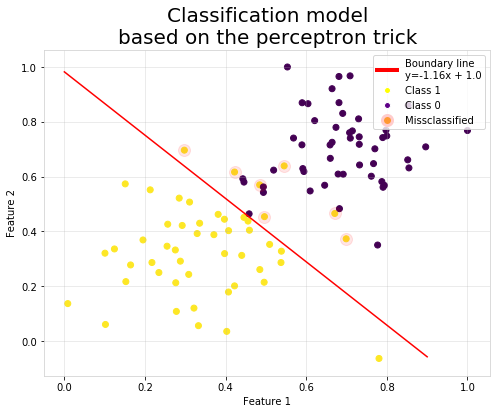

In [11]:
# plot the results
plot_separation(X_data=X, y_data=y,
                    line_params={"k": final_line[0], "b": final_line[1]})